In [2]:
#numpy library import
import numpy as np
from sklearn.preprocessing import StandardScaler
#pandas library import
import pandas as pd
import umap
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


#import graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
%matplotlib inline

training_df = pd.read_csv('Train_Arabic_Digit.txt', sep = ' ')
training_df =training_df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

test_df = pd.read_csv('Test_Arabic_Digit.txt', sep = ' ')
test_df =test_df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

coefs = 6
print(test_df.head(50))

    Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0      1.25720     -8.2449    0.848300   -1.578200    0.473600   -0.063273
1      3.36380     -9.0154    1.410400   -1.588400    1.372500   -0.334810
2      3.44610     -9.4871    1.342500   -1.406600    1.442200    0.124470
3      4.77300    -10.0070    1.214300   -2.011800    2.086400    0.285620
4      5.33170     -9.6834    1.513100   -2.354500    1.693300    0.066311
5      5.42910     -9.8495    0.970510   -2.144000    1.554900   -0.781070
6      5.41290     -9.5408    0.651860   -2.215300    0.939050   -0.818020
7      4.72970     -6.4355    1.995200   -0.719850    0.442830   -1.374000
8      4.92460     -2.9696    2.073900   -1.455200   -0.763900   -2.312000
9      5.47380     -1.6604    0.448830   -0.883660   -1.531800   -2.632900
10     6.36620     -2.7119    0.221650   -0.592630   -1.395400   -2.012600
11     6.59220     -2.9234    0.058889   -0.976610   -1.341200   -1.914700
12     6.56250     -2.909

In [169]:
numClusters=7

    Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0     -0.81101   -7.238200    1.542900   -0.647740    1.427100    0.613560
1     -0.37028   -7.133600    1.885600   -0.343160    0.967330    0.327630
2      0.59659   -8.305900    1.694300   -0.666110    0.349670   -0.174250
3      1.45850   -8.195700    1.845400   -1.149600    0.826600   -0.513130
4      2.08240   -8.667000    1.199500   -1.124000    1.244500   -0.102510
5      1.99960   -8.536900    1.325200   -0.649020    1.295400   -0.171020
6      2.57840   -7.757300    2.104800   -1.112500    1.010800   -0.692160
7      2.25840   -8.607100    0.907130   -1.375200    0.125140   -0.665820
8      2.50790   -7.463800    1.474900   -1.521600    0.454380    0.147430
9      3.25360   -8.568500    0.901470   -2.640400   -0.133320   -0.109950
10     1.92340   -3.678400    2.557100   -0.290330   -0.282410   -0.873910
11     4.46640   -2.520500    0.651490    1.866300   -1.833400   -1.686500
12     5.35260   -3.27110

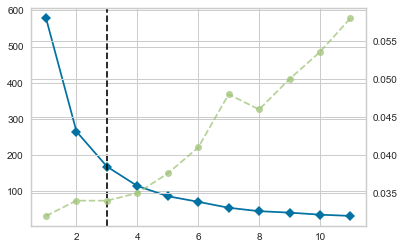

In [168]:
first0 = training_df.iloc[0:38]
print(first0)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(first0)
#shows the optimal number to be 3 which fits my guess of 3 to 4 phonemes in the word



In [178]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(first0)
kmeans.labels_

array([3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 2, 2, 2, 2, 2, 2, 4, 4, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4])

In [179]:
features=first0.values
#print(features)
scaled_features = StandardScaler().fit_transform(features)
reducer=umap.UMAP()
reduced_first_0=reducer.fit_transform(scaled_features)
reduced_first_0.shape


(38, 2)

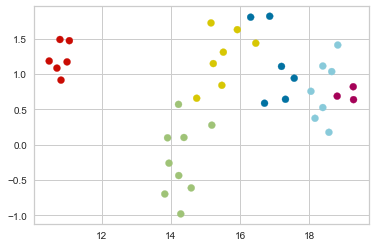

In [180]:
plt.scatter(
    reduced_first_0[:,0],
    reduced_first_0[:,1],
    c=[sns.color_palette()[x] for x in kmeans.labels_])

In [181]:
#Gather data for all zero
zero = pd.DataFrame()
start = 0
counter = 0
for i in range(1):
    for i in range(660):
        while not (np.isnan(training_df.iloc[counter][0])):
            counter=counter+1
        zero =zero.append(training_df.iloc[start:counter])
        start=counter+1
        counter=counter+1
    
zero.shape



(23344, 6)

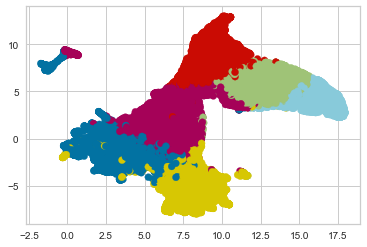

In [191]:
zero_kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(zero)
zero_features=zero.values
reduced_0=reducer.fit_transform(zero_features)
plt.scatter(
    reduced_0[:,0],
    reduced_0[:,1],
    c=[sns.color_palette()[x] for x in zero_kmeans.labels_])

In [192]:
#Gather data for all zero_men and zero_women
zero_men = pd.DataFrame()
zero_women = pd.DataFrame()
start = 0
counter = 0

for i in range(330):
    while not (np.isnan(training_df.iloc[counter][0])):
        counter=counter+1
    zero_men =zero_men.append(training_df.iloc[start:counter])
    start=counter+1
    counter=counter+1
for i in range(330):
    while not (np.isnan(training_df.iloc[counter][0])):
        counter=counter+1
    zero_women =zero_women.append(training_df.iloc[start:counter])
    start=counter+1
    counter=counter+1




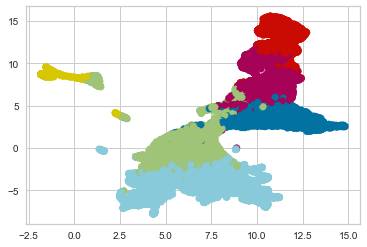

In [193]:
zero_men_kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(zero_men)
zero_men_features=zero_men.values
zero_men_scaled_features = StandardScaler().fit_transform(zero_men_features)
reduced_men_0=reducer.fit_transform(zero_men_features)
plt.scatter(
    reduced_men_0[:,0],
    reduced_men_0[:,1],
    c=[sns.color_palette()[x] for x in zero_men_kmeans.labels_])



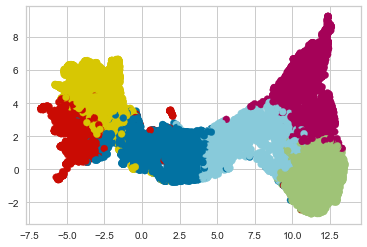

In [194]:
zero_women_kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(zero_women)
zero_women_features=zero_women.values
zero_women_scaled_features = StandardScaler().fit_transform(zero_women_features)
reduced_women_0=reducer.fit_transform(zero_women_features)
plt.scatter(
    reduced_women_0[:,0],
    reduced_women_0[:,1],
    c=[sns.color_palette()[x] for x in zero_women_kmeans.labels_])

In [195]:
#Seperate the clusters
cluster0 = pd.DataFrame()
cluster1 = pd.DataFrame()
cluster2 = pd.DataFrame()
cluster3 = pd.DataFrame()
cluster4 = pd.DataFrame()
cluster5 = pd.DataFrame()

for i in range(zero.shape[0]):
    if(zero_kmeans.labels_[i]==0):
        cluster0 = cluster0.append(zero.iloc[i:i+1])
    if(zero_kmeans.labels_[i]==1):
        cluster1 = cluster1.append(zero.iloc[i:i+1])
    if(zero_kmeans.labels_[i]==2):
        cluster2 = cluster2.append(zero.iloc[i:i+1])
    if(zero_kmeans.labels_[i]==3):
        cluster3 = cluster3.append(zero.iloc[i:i+1])
    if(zero_kmeans.labels_[i]==4):
        cluster4 = cluster4.append(zero.iloc[i:i+1])
    if(zero_kmeans.labels_[i]==5):
        cluster5 = cluster5.append(zero.iloc[i:i+1])

clusters = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5]
cluster0Mean = zero_kmeans.cluster_centers_[0]
cluster1Mean = zero_kmeans.cluster_centers_[1]
cluster2Mean = zero_kmeans.cluster_centers_[2]
cluster3Mean = zero_kmeans.cluster_centers_[3]
cluster4Mean = zero_kmeans.cluster_centers_[4]
cluster5Mean = zero_kmeans.cluster_centers_[5]

total = zero.shape[0]
pi0 = cluster0.shape[0]/total
pi1 = cluster1.shape[0]/total
pi2 = cluster2.shape[0]/total
pi3 = cluster3.shape[0]/total
pi4 = cluster4.shape[0]/total
pi5 = cluster5.shape[0]/total





In [196]:
#Using a independent covariance
#cluster0
covariance0 = np.zeros((coefs,coefs))
for i in range(coefs):
     covariance0[i][i] = cluster0.iloc[:,i].var()

#cluster1
covariance1 = np.zeros((coefs,coefs))
for i in range(coefs):
     covariance1[i][i] = cluster1.iloc[:,i].var()

#cluster2
covariance2 = np.zeros((coefs,coefs))
for i in range(coefs):
     covariance2[i][i] = cluster2.iloc[:,i].var()

#cluster3
covariance3 = np.zeros((coefs,coefs))
for i in range(coefs):
     covariance3[i][i] = cluster3.iloc[:,i].var()

#cluster4
covariance4 = np.zeros((coefs,coefs))
for i in range(coefs):
     covariance4[i][i] = cluster4.iloc[:,i].var()

#cluster5
covariance5 = np.zeros((coefs,coefs))
for i in range(coefs):
     covariance5[i][i] = cluster5.iloc[:,i].var()




In [197]:
print(pi0)

0.17914667580534613


In [198]:
def gauss (x, sig, mu):
    gaussian = (2*np.pi)**(-7.0/2)*np.linalg.det(sig)**(-1.0/2)*np.exp(-0.5*np.matrix(x-mu) @ np.linalg.inv(sig) @ np.transpose(np.matrix(x-mu)))
    return float(gaussian)


In [201]:
# define model
l=0
counter = 0
for j in range(test_df.shape[0]):
    if np.isnan(test_df.values[j][0]) :
        test =test_df.iloc[l:j].values
        clustSum = np.zeros(test.shape[0])
        for i in range(test.shape[0]):
            x = test[i:i+1]
            clustSum[i] = np.log((pi0*gauss(x, covariance0, cluster0Mean ) + pi1*gauss(x, covariance1, cluster1Mean ) + pi2*gauss(x, covariance2, cluster2Mean ) + pi3*gauss(x, covariance3, cluster3Mean )))
        mle = np.sum(clustSum)
        l=j+1
        counter = counter+1

KeyboardInterrupt: 